=== Original Data ===
   time      value
0     0  52.483571
1     1  50.607013
2     2  55.825136
3     3  61.470351
4     4  53.923417
5     5  55.123571
6     6  65.342489
7     7  62.379351
8     8  57.226189
9     9  63.246069

Shape: (100, 2)
Mean: 66.20, Std: 11.71

=== DataFrame with EWMA columns ===
   time      value   ewma_0.1   ewma_0.3   ewma_0.5   ewma_0.9
0     0  52.483571  52.483571  52.483571  52.483571  52.483571
1     1  50.607013  52.295915  51.920603  51.545292  50.794668
2     2  55.825136  52.648837  53.091963  53.685214  55.322089
3     3  61.470351  53.530988  55.605480  57.577783  60.855525
4     4  53.923417  53.570231  55.100861  55.750600  54.616627
5     5  55.123571  53.725565  55.107674  55.437085  55.072876
6     6  65.342489  54.887258  58.178118  60.389787  64.315528
7     7  62.379351  55.636467  59.438488  61.384569  62.572968
8     8  57.226189  55.795439  58.774798  59.305379  57.760867
9     9  63.246069  56.540502  60.116180  61.275724  62.69754

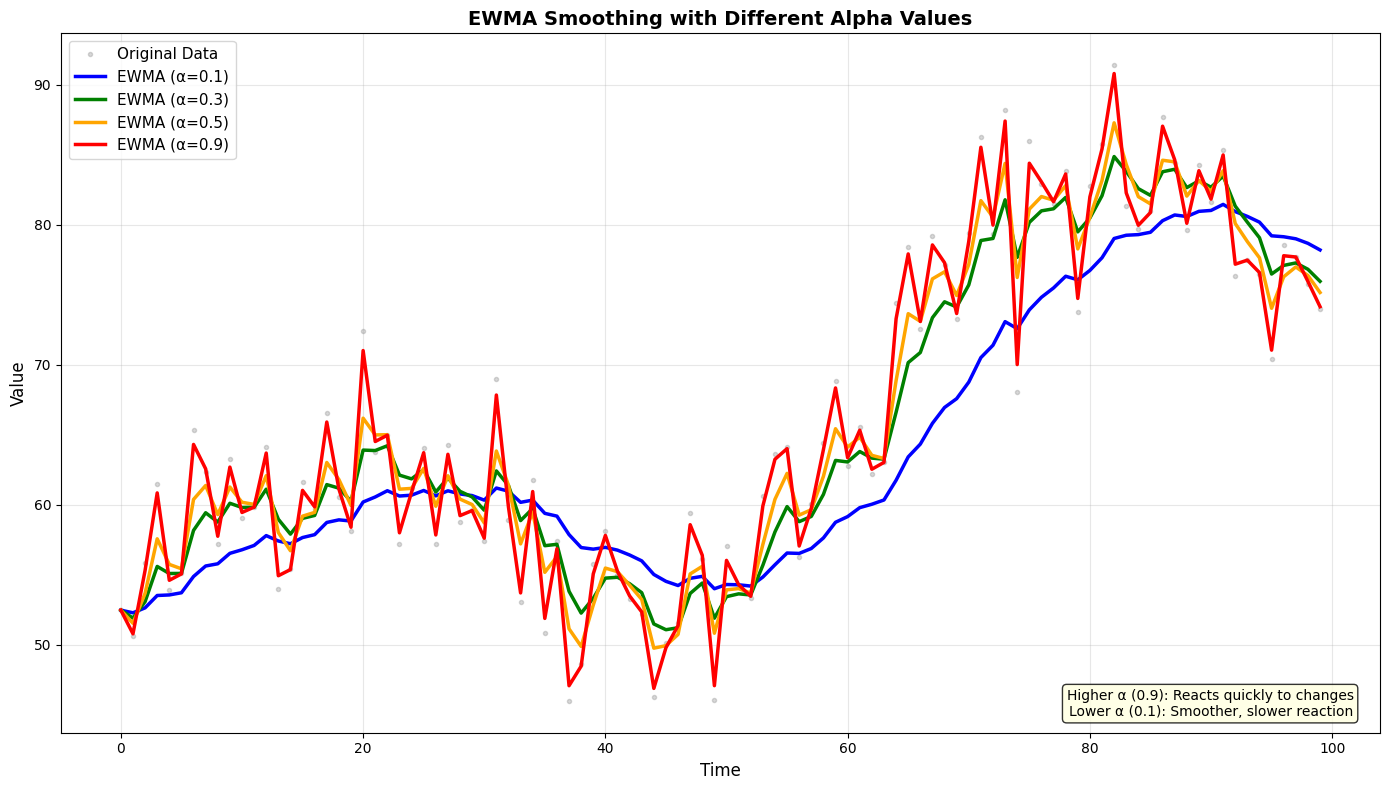


=== Summary Statistics ===
             time       value    ewma_0.1    ewma_0.3    ewma_0.5    ewma_0.9
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    49.500000   66.195507   63.880896   65.647726   65.968714   66.171431
std     29.011492   11.713213    9.577777   10.883745   11.101973   11.551950
min      0.000000   46.003288   52.295915   51.087364   49.771021   46.898199
25%     24.750000   57.219653   56.717255   57.730550   57.203934   57.482290
50%     49.500000   63.436711   60.272221   61.415495   62.056367   63.310246
75%     74.250000   77.238544   73.292739   77.142016   76.728351   77.336222
max     99.000000   91.396776   81.453342   84.870326   87.278203   90.797596

=== Smoothing Effect (Standard Deviation) ===
Original: 11.71
α = 0.1: 9.58
α = 0.3: 10.88
α = 0.5: 11.10
α = 0.9: 11.55


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
n_points = 100

# Create time series components
time = np.arange(n_points)
trend = 0.3 * time
seasonality = 10 * np.sin(time / 10)
noise = np.random.randn(n_points) * 5
data = 50 + trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({
    'time': time,
    'value': data
})

print("=== Original Data ===")
print(df.head(10))
print(f"\nShape: {df.shape}")
print(f"Mean: {df['value'].mean():.2f}, Std: {df['value'].std():.2f}")

# Calculate EWMA for different alpha values
def calculate_ewma(data, alpha):
    ewma = [data[0]]
    for i in range(1, len(data)):
        new_value = alpha * data[i] + (1 - alpha) * ewma[i-1]
        ewma.append(new_value)
    return ewma

# Add EWMA columns for different alphas
alphas = [0.1, 0.3, 0.5, 0.9]
for alpha in alphas:
    df[f'ewma_{alpha}'] = calculate_ewma(df['value'].values, alpha)

print("\n=== DataFrame with EWMA columns ===")
print(df.head(10))

# Plot results
plt.figure(figsize=(14, 8))

# Plot original data
plt.plot(df['time'], df['value'], 'o', alpha=0.3, markersize=3,
         label='Original Data', color='gray')

# Plot EWMA for each alpha
colors = ['blue', 'green', 'orange', 'red']
for alpha, color in zip(alphas, colors):
    plt.plot(df['time'], df[f'ewma_{alpha}'], linewidth=2.5,
             label=f'EWMA (α={alpha})', color=color)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('EWMA Smoothing with Different Alpha Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add explanation box
explanation = """Higher α (0.9): Reacts quickly to changes
Lower α (0.1): Smoother, slower reaction"""
plt.text(0.98, 0.02, explanation, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.show()

# Summary statistics
print("\n=== Summary Statistics ===")
print(df.describe())

# Compare smoothing effect
print("\n=== Smoothing Effect (Standard Deviation) ===")
print(f"Original: {df['value'].std():.2f}")
for alpha in alphas:
    print(f"α = {alpha}: {df[f'ewma_{alpha}'].std():.2f}")